In [1]:
import torch
import math

In [2]:
emb_size = 128
dropout = 0.5
max_len = 5000

In [7]:
# 变化率参数权重
theta = torch.exp(- torch.arange(0, emb_size, step=2) * math.log(10000.0) / emb_size)
theta.shape

torch.Size([64])

In [8]:
# 位置索引张量
pos = torch.arange(0, max_len).reshape(max_len, 1)
pos.shape

torch.Size([5000, 1])

In [9]:
# 初始化位置权重矩阵
pos_emb = torch.zeros(max_len, emb_size)
pos_emb.shape

torch.Size([5000, 128])

In [10]:
# 奇数行，偶数行词向量值分别对应正弦余弦
pos_emb[:, 0::2] = torch.sin(pos * theta)
pos_emb[:, 1::2] = torch.cos(pos * theta)

In [15]:
# 模拟传统embedding + positional encoding
import torch.nn as nn

emb = nn.Embedding(100, emb_size)
pos_emb = pos_emb.unsqueeze(1) #和token embedding对齐

# 输入token_idx
input_data = torch.randint(0, 100, (100, 10))
# embedding
token_emb = emb(input_data)

result = token_emb + pos_emb[:input_data.shape[0], :]

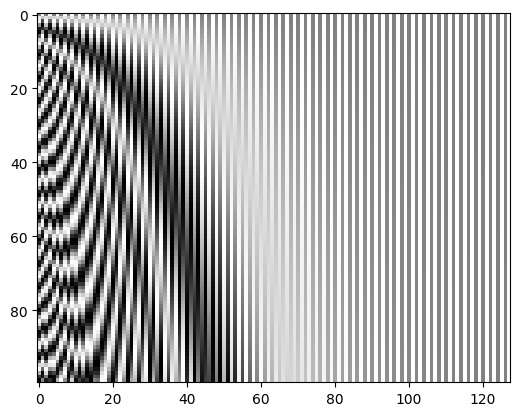

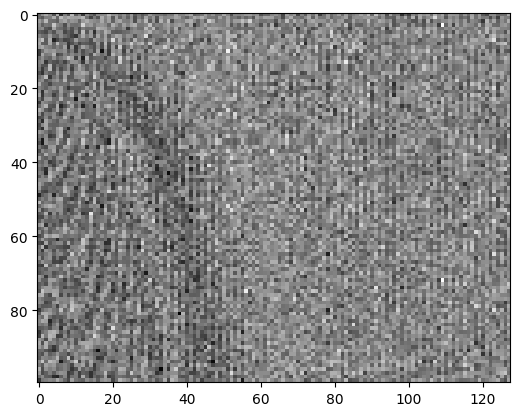

In [18]:
# 位置编码可视化
import matplotlib.pyplot as plt

plt.imshow(pos_emb.squeeze()[:100], cmap='gray')
plt.show()

plt.imshow(result[:,0].detach().numpy(), cmap='gray')
plt.show()